# Optimization

## Stochastic Gradient Descent (SGD)
- Essentially just subtracting the parameter gradients times a **learning rate** from the current weights and biases
- Each full forward and backward pass is called an **epoch**. Perform many epochs to reduce the loss and increase the accuracy

## Learning Rate
- Parameter that multiplies by the gradient to update the weights and biases
- Smaller learning rate means smaller steps along the "loss function curve" to more accurately find the global minimum
- Small steps ensure we follow direction of steepest descent (don't bounce back and forth), but if too small leads to stagnation
- Stagnation means the model gets stuck in a local minimum, not the global

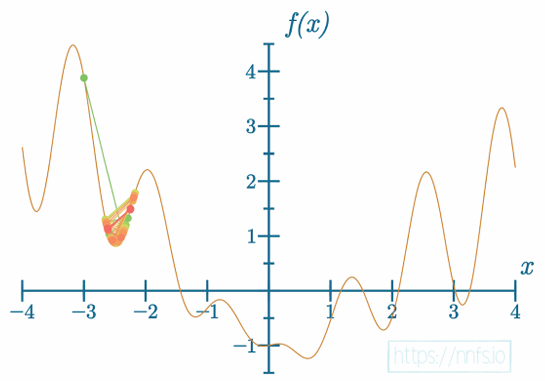
- Changing the learning rate can improve how the model learns, with a larger step the model can get stuck in a "better" local minimum

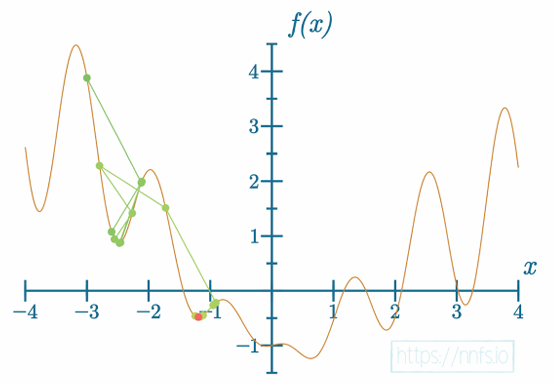

- **Momentum** can be added to the optimization process, like inertia

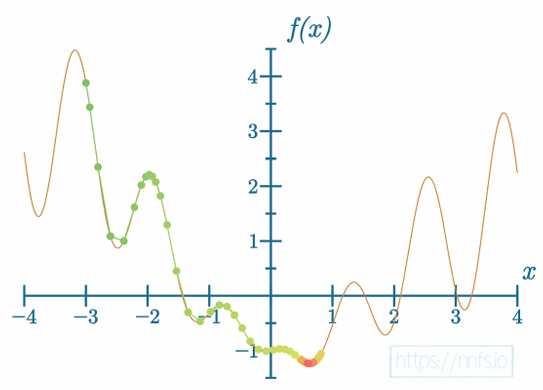

- **Gradient explosion**: learning rate set too high and model starts jumping around, overshooting. Parameter updates cause the function output to increase and the gradient explodes to cause an overflow

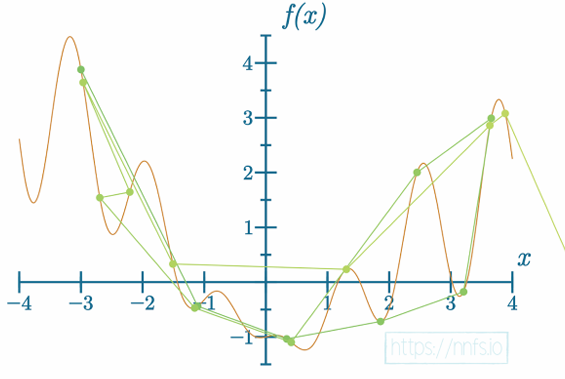

- Good rule of thumb is to start with a larger learning rate to take the initial steps faster, and then fine tune it later
- Useful to have a model that can tune parameters during runtime in case weird behavior is being observed, can still save the model by changing a parameter
- A solution to automate this is **learning rate decay** 

- **Exponential decay**: reduce the learning rate each step. 
- Have another parameter **learning_rate_decay**
- Set learning rate equal to the starting rate times the reciprocal of the decay rate times the step
- With more epochs, the step increases, and the reciprocal decreases
- Need to have a +1 to prevent the algorithm from ever raising the learning rate (1 / (1+x) will always be less than 1 for x>0)



In [33]:
starting_learning_rate = 1.0
learning_rate_decay = 0.1
step = 1

learning_rate = starting_learning_rate * (1.0 / (1 + learning_rate_decay * step))
print(learning_rate)

0.9090909090909091


## Momentum
- Imagine a ball rolling down a hill, there may be small areas where the hill goes up and the ball gets stuck in it, i.e) the model gets stuck in a local minimum rather than finding a global minimum
- Implementing momentum allows the ball to be more likely to roll past these local minimums and keep going in the direction of the global gradient descent
- Momentum uses the previous update's direction to influence the next update's direction to minimize the chance of the loss bouncing around in a local minimum
- Set a hyperparameter between 0 and 1 which represents the fraction of the previous parameter update to retain
- Subtract the current gradient multiplied by the learning rate
- Doing this preserves some of the momentum of the previous update. Having a higher momentum slows down how the current gradient can update the weights. But having too high of momentum will lead to the model not learning

## AdaGrad
- SGD updates every weight and bias by a global learning rate. Simplistic
- **Adaptive gradient**: an adaptation of SGD, implements per-parameter learning rate rather than global learning rate. Some weights rise significantly higher than others with a global rate, it is better to not have weights that rise much faster than others, better to have smaller updates
- Cache holds history of squared gradients
- Updates is the learning rate times gradient (same as SGD) divided by the square root of the cache plus an epsilon hyperparameter
- If cache is constantly rising the updates become smaller with time which may cause learning to stall
- Learning rates for parameters with smaller gradients are decreased slower, learning rates for parameters with higher gradients are decreased faster, kind of leveling the rate of change over all the weights

In [34]:
import numpy as np

eps = 1e-7
gradient = np.array([2, 4, 3])
cache = np.zeros_like(gradient)

cache += gradient ** 2
updates = -learning_rate * gradient / (np.sqrt(cache) + eps)

## RMSProp
- Another adaptation of SGD
- **Root mean square propagation**: similar to Adagrad, calculate adaptive learning rate per parameter
- Cache calculated differently. Similar to SGD optimizer with momentum and cache with Adagrad. But the cache is implemented in same way as Adagrad
- RMSProp adds mechanism similar to momentum but adds a per-parameter adaptive learning rate
- Hyperparameter rho is the cache memory decay rate
- Requires smaller learning rate of default 0.001

In [35]:
rho = 0.9
cache = rho * cache + (1-rho) * gradient ** 2
updates = -learning_rate * gradient / (np.sqrt(cache) + eps)

## Adam
- **Adaptive momentum**: currently most widely used optimizer based on RMSProp, with the momentum of SGD added in
- First apply momentums like in SGD, then apply per-weight adaptive learning rate like in RMSProp
- Apply a "bias correction", not the bias as in the neuron bias
- There are two bias correction factors, beta_1 which applies to the momentum, and beta_2 which applies to the cache
- Both momentum and cache are divided by $1-\beta^{step}$. As step raises (time goes on), the beta term approaches zero, so the total term divided by momentum and cache goes to 1, meaning there is no correction as time goes on
- But for early steps, the $\beta^{step}$ term is high, so momentum and cache are divided by a fraction, increasing them

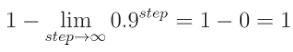

- This helps compensate for the initial zeroed values of momentum and cache, speeding up training in the initial stages and slowing it down later on